# The Oscars

Data Visualisation - Project 7

Great stories and great visual effects

Data Source: https://github.com/fivethirtyeight/data/tree/master/soccer-spi

The data are contained in the files spi_matches.csv

This notebook is a data visualisation on scores, teams and matches for the soccer datasets. Exploratory data analysis is also performed on the data set to produce interesting results.

Reference 
-  https://www.kaggle.com/pavanraj159/european-football-data-analysis/notebook
-  https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

## Importing Library and Datasets

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import itertools

#### Import Data

In [2]:
data = pd.read_csv("spi_matches.csv")    #use your own path for the data set
data.head(10)

,date,league_id,match_api_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,8/12/16,1843,1421,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,8/12/16,1843,1422,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,8/13/16,2411,1423,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,8/13/16,2411,1424,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
4,8/13/16,2411,1425,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
5,8/13/16,2411,1426,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,...,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
6,8/13/16,2411,1427,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
7,8/13/16,2411,1428,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
8,8/13/16,1843,1429,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,...,37.9,44.2,3.0,2.0,1.03,1.84,1.10,2.26,3.12,2.10
9,8/13/16,2411,1430,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,...,73.0,27.0,2.0,1.0,2.14,1.25,1.81,0.92,2.10,1.05


In [3]:
#check null values
data.isnull().sum()

date                0
league_id           0
match_api_id        0
league              0
team1               0
team2               0
spi1                0
spi2                0
prob1               0
prob2               0
probtie             0
proj_score1         0
proj_score2         0
importance1     10327
importance2     10327
score1           6496
score2           6496
xg1             12203
xg2             12203
nsxg1           12203
nsxg2           12203
adj_score1      12203
adj_score2      12203
dtype: int64

In [4]:
#as this is a big dataset we can drop Null Values 
data.dropna(inplace=True)
data.isnull().sum()

date            0
league_id       0
match_api_id    0
league          0
team1           0
team2           0
spi1            0
spi2            0
prob1           0
prob2           0
probtie         0
proj_score1     0
proj_score2     0
importance1     0
importance2     0
score1          0
score2          0
xg1             0
xg2             0
nsxg1           0
nsxg2           0
adj_score1      0
adj_score2      0
dtype: int64

## Exploratory Data Analysis Begins

### Matches by League

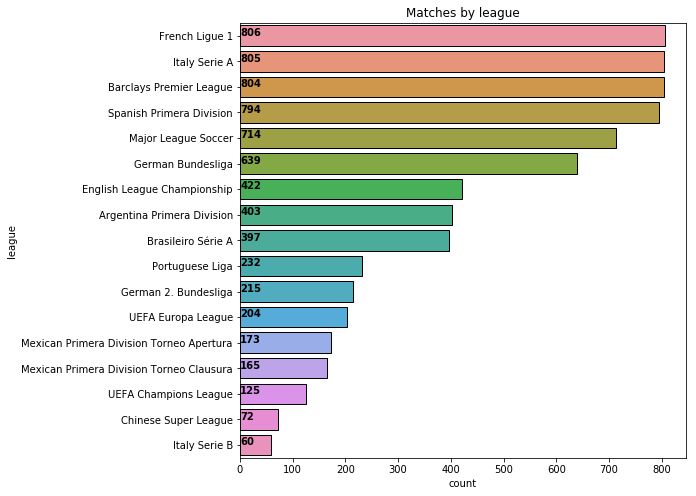

In [5]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

### Home and away goals by league

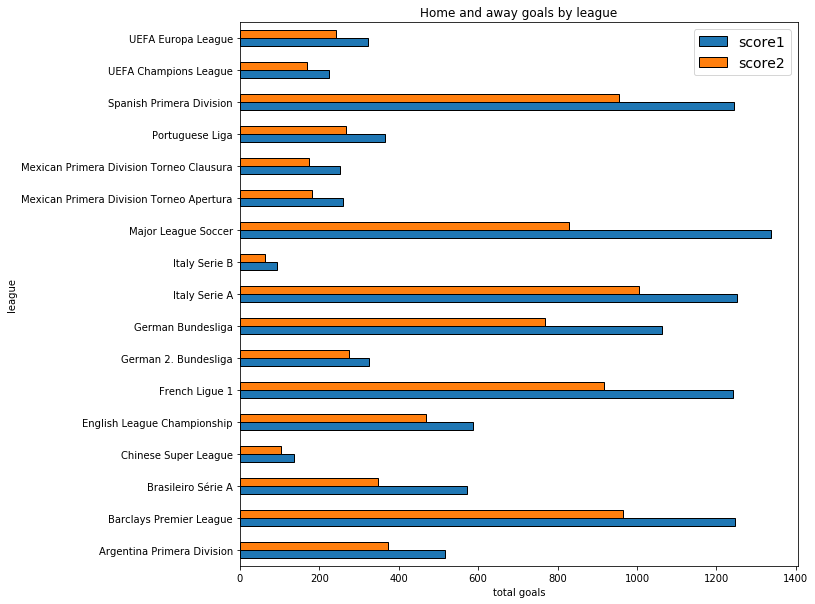

In [6]:
data.groupby("league").agg({"score1":"sum","score2":"sum"}).plot(kind="barh",
                                                            figsize = (10,10),
                                                            edgecolor = "k",
                                                            linewidth =1 )
plt.title("Home and away goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

### TOP TEAMS BY THEIR HOME & AWAY GOALS

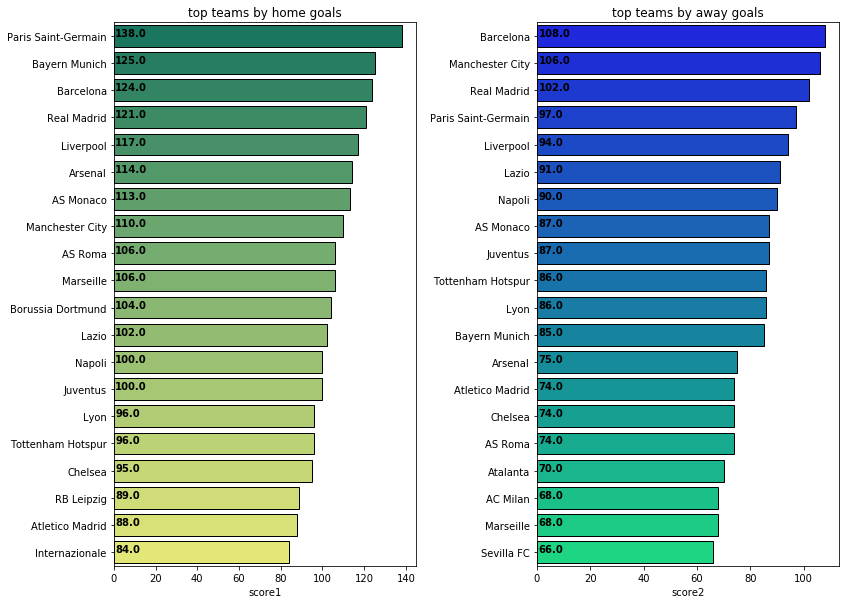

In [7]:
h_t = data.groupby("team1")["score1"].sum().reset_index()
a_t = data.groupby("team2")["score2"].sum().reset_index()
h_t = h_t.sort_values(by="score1",ascending= False)
a_t = a_t.sort_values(by="score2",ascending= False)
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="team1",x="score1",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["score1"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="team2",x="score2",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["score2"][:20]):
    ax.text(.7,i,j,weight = "bold")

### Teams with highest total goals

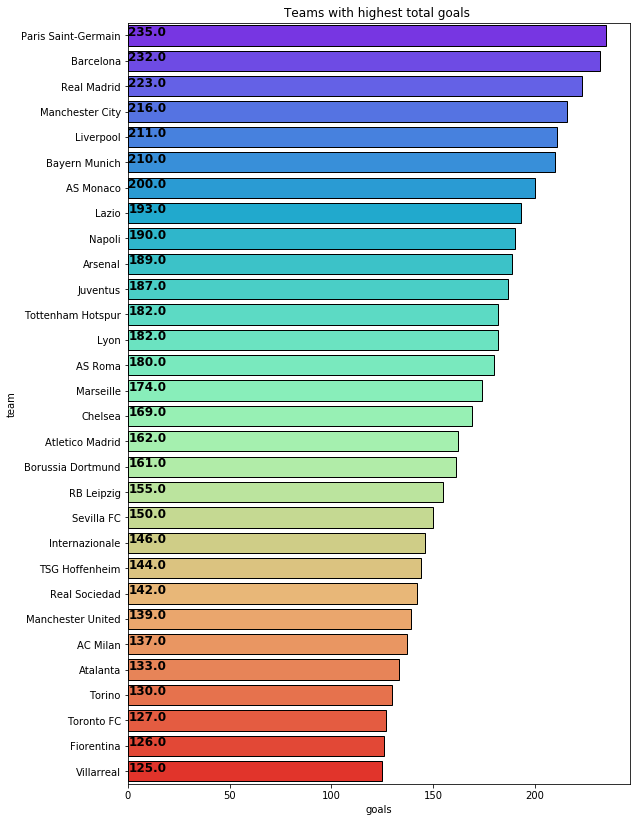

In [8]:
x = h_t
x = x.rename(columns={'team1':"team", 'score1':"goals"})
y = a_t
y = y.rename(columns={'team2':"team", 'score2':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()

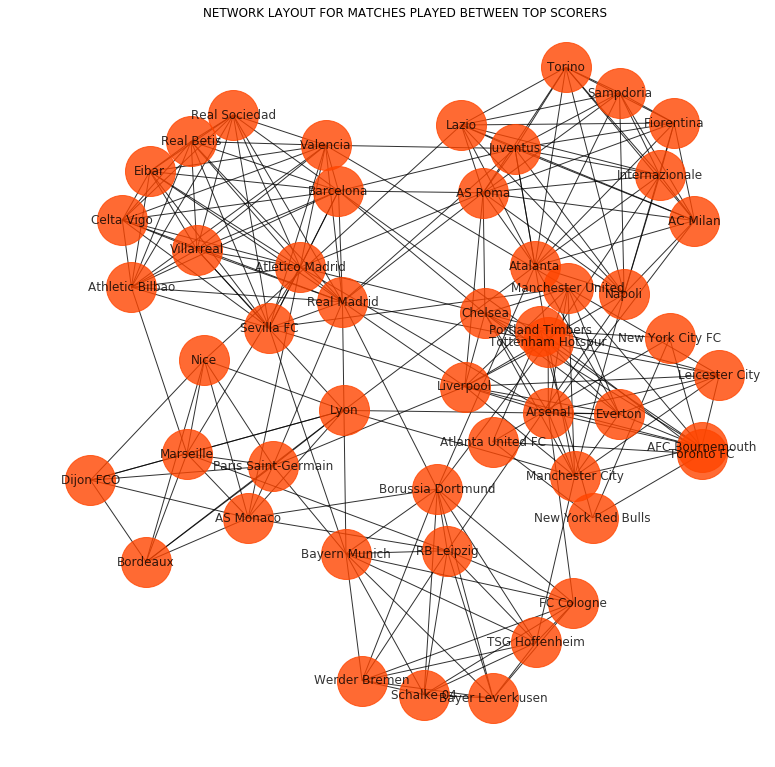

In [9]:
#selecting top 50 teams with highest goals
ts = list(goals["team"][:50])
v =data[["team1","team2"]]
v = v[(v["team1"].isin(ts)) & (v["team2"].isin(ts))]
import networkx as nx
g = nx.from_pandas_edgelist(v,"team1","team2")
fig = plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g,with_labels =True,node_size =2500,node_color ="Orangered",alpha=.8)
plt.title("NETWORK LAYOUT FOR MATCHES PLAYED BETWEEN TOP SCORERS")
fig.set_facecolor("white")

### DISTRIBUTION OF HOME AND AWAY GOALS

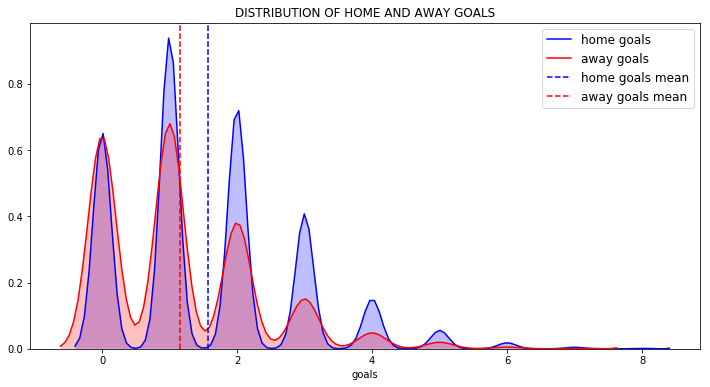

In [10]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["score1"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["score2"],shade=True,
            color="r",label="away goals")
plt.axvline(data["score1"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["score2"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

### MATCHES VS GOALS BY TEAMS

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


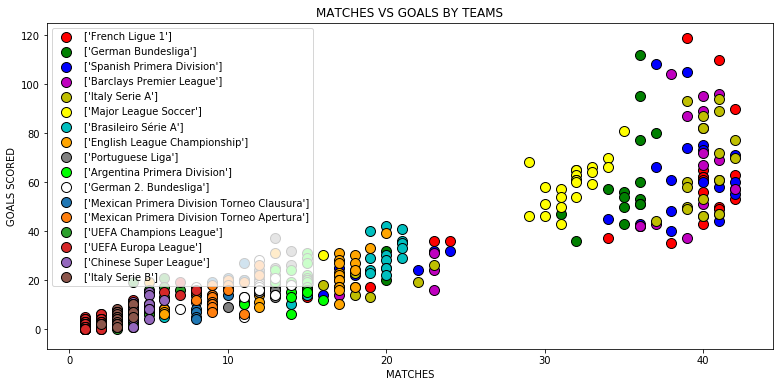

In [11]:
x = data.groupby(["team1","league"]).agg({"match_api_id":"count","score1":"sum"}).reset_index()
y = data.groupby(["team2","league"]).agg({"match_api_id":"count","score2":"sum"}).reset_index()
x = x.rename(columns={'team1':"team", 'match_api_id':"matches", 'score1':"goals"})
y = y.rename(columns={'tean2':"team", 'match_api_id':"matches", 'score2':"goals"})
xy = pd.concat([x,y])
xy = xy.groupby(["team","league"])[["matches","goals"]].sum().reset_index()
xy = xy.sort_values(by="goals",ascending=False)
plt.figure(figsize=(13,6))
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"]
lg = xy["league"].unique()
for i,j,k in itertools.zip_longest(lg,range(len(lg)),c):
    plt.scatter("matches","goals",data=xy[xy["league"] == i],label=[i],s=100,alpha=1,linewidths=1,edgecolors="k",color=k)
    plt.legend(loc="best")
    plt.xlabel("MATCHES")
    plt.ylabel("GOALS SCORED")

plt.title("MATCHES VS GOALS BY TEAMS")
plt.show()

### MATCHES VS GOALS BY TOP 50 TEAMS

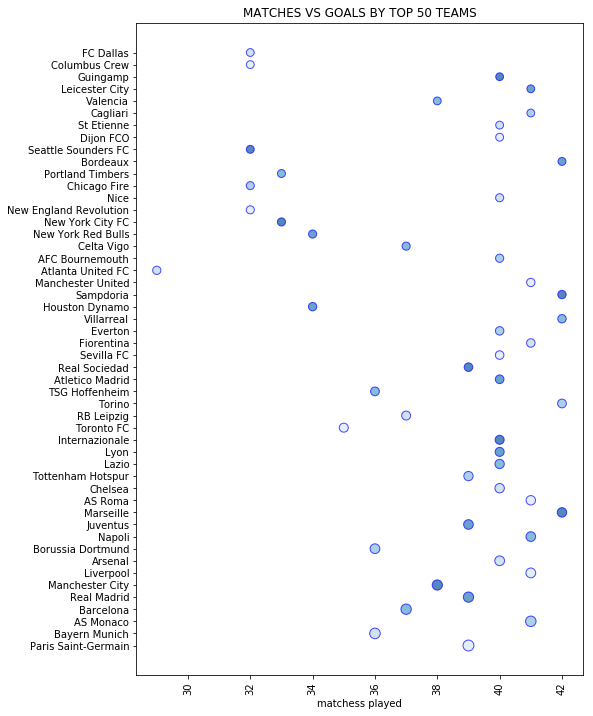

In [12]:
plt.figure(figsize=(8,12))
plt.scatter(y = xy["team"][:50],x = xy["matches"][:50],
            s=xy["goals"],alpha=.7,c=sns.color_palette("Blues"),
            linewidths=1,edgecolors="b")
plt.xticks(rotation = 90)
plt.xlabel("matchess played")
plt.title("MATCHES VS GOALS BY TOP 50 TEAMS")
plt.show()

In [13]:
#create new feature for winning team
def label(data):
    if data["score1"] > data["score2"]:
        return data["team1"]
    elif data["score2"] > data["score1"]:
        return data["team2"]
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [14]:
data["win"] = data.apply(lambda data:label(data),axis=1)

In [15]:
#create new feature for outcome of match
def lab(data):
    if data["score1"] > data["score2"]:
        return "HOME TEAM WIN"
    elif data["score2"] > data["score1"]:
        return "AWAY TEAM WIN"
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [16]:
data["outcome_side"] = data.apply(lambda data:lab(data),axis = 1)

In [17]:
#create new feature for losing team
def labe(data):
    if data["score1"] < data["score2"]:
        return data["team1"]
    elif data["score2"] < data["score1"]:
        return data["team2"]
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [18]:
data["lost"] = data.apply(lambda data:labe(data),axis=1)

### PROPORTION OF GAME OUTCOMES

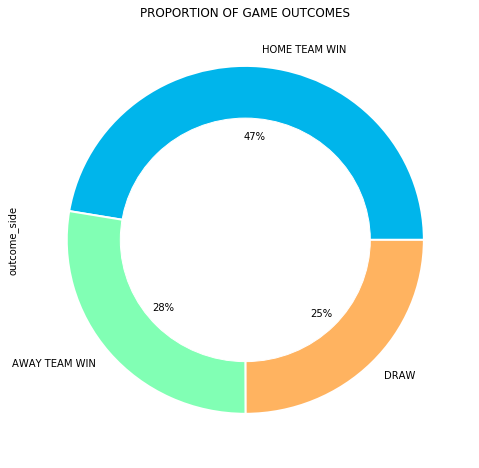

In [19]:
plt.figure(figsize=(8,8))
data["outcome_side"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GAME OUTCOMES")
plt.show()

### TOP WINNING & LOSING TEAMS

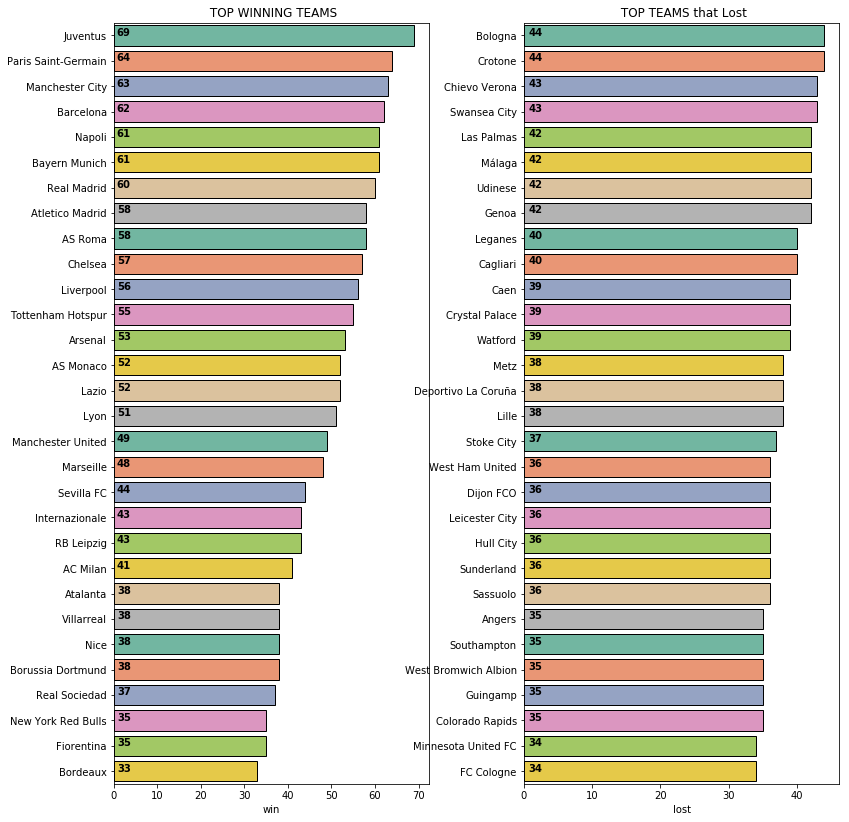

In [20]:
win = data["win"].value_counts()[1:].reset_index()
lost = data["lost"].value_counts()[1:].reset_index()
plt.figure(figsize=(13,14))
plt.subplot(121)
ax = sns.barplot(win["win"][:30],win["index"][:30],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*30)
plt.title(" TOP WINNING TEAMS")
plt.ylabel("")
for i,j in enumerate(win["win"][:30]):
    ax.text(.7,i,j,color = "black",weight = "bold")
    
plt.subplot(122)
ax = sns.barplot(lost["lost"][:30],lost["index"][:30],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*30)
plt.title(" TOP TEAMS that Lost")
plt.subplots_adjust(wspace = .3)
plt.ylabel("")
for i,j in enumerate(lost["lost"][:30]):
    ax.text(.7,i,j,color = "black",weight = "bold")

In [21]:
#merge win,draw and lost data of team to matches played
f = xy.merge(win,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
f = f.rename(columns={"outcome":"wins"})
f = f.merge(lost,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
dr = data[data["outcome_side"] == "DRAW"][["team1","team2"]]
l  = dr["team1"].value_counts().reset_index()
v  = dr["team2"].value_counts().reset_index()
l  = l.rename(columns={'index':"team", 'team1':"draw"})
v  = v.rename(columns={'index':"team", 'team2':"draw"})
lv = pd.concat([l,v])
lv = lv.groupby("team")["draw"].sum().reset_index()
f = f.merge(lv,left_on="team",right_on="team",how ="left")

### PERFORMANCE BY TOP TEAMS

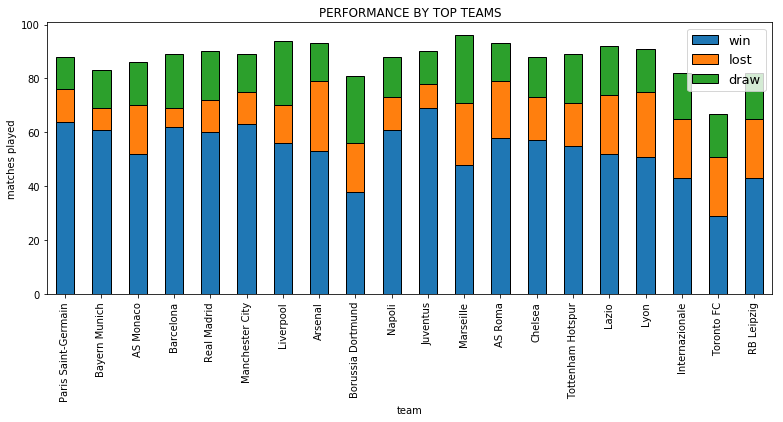

In [22]:
f = f.sort_values(by="goals",ascending=False)
f_new = f.copy()
f_new.index = f_new.team
f_new[["win","lost","draw"]][:20].plot(kind = "bar",figsize=(13,5),
                                   stacked =True,linewidth = 1,
                                   edgecolor = "k"*20
                                  )
plt.legend(loc="best",prop = {"size" : 13})
plt.title("PERFORMANCE BY TOP TEAMS")
plt.ylabel("matches played")
plt.show()

### WIN VS LOST VS DRAW

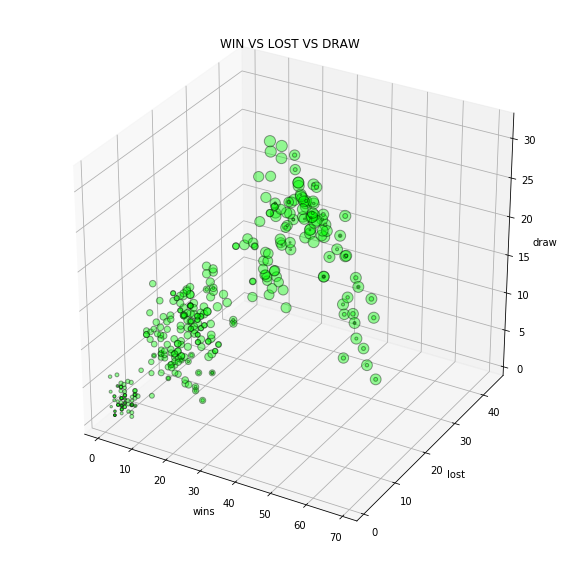

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111,projection ="3d")
ax.scatter(f["win"],f["lost"],f["draw"],s=f["matches"]*3,
           alpha=.4,linewidth =1,edgecolor= "k",c = "lime")
ax.set_xlabel("wins")
ax.set_ylabel("lost")
ax.set_zlabel("draw")
plt.title("WIN VS LOST VS DRAW")
plt.show()

### TOP TEAMS BY LEAGUES

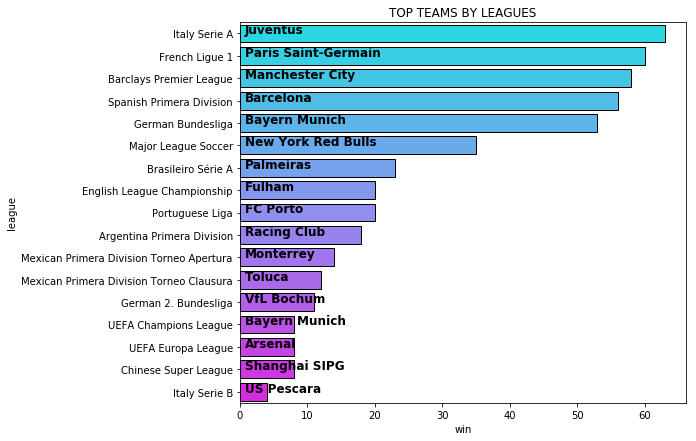

In [24]:
x = pd.DataFrame(data.groupby(["league","win"])["win"].count())
x = x.rename(columns={"win":"team"}).reset_index()
x = x.rename(columns={"win":"team","team":"win"})
x = x.sort_values(by="win",ascending=False)
x = x[x["team"] != "DRAW"]
x = x.drop_duplicates(subset=["league"],keep="first")
plt.figure(figsize=(8,7))
ax =sns.barplot(x["win"],x["league"],palette="cool",
               linewidth = 1 ,edgecolor = "k"*10)
for i,j in enumerate(x["team"]):
    ax.text(.7,i,j,weight = "bold",fontsize = 12)
plt.title("TOP TEAMS BY LEAGUES")
plt.show()

### MATCHES PLAYED IN EACH LEAGUE VS TOTAL GOALS SCORED

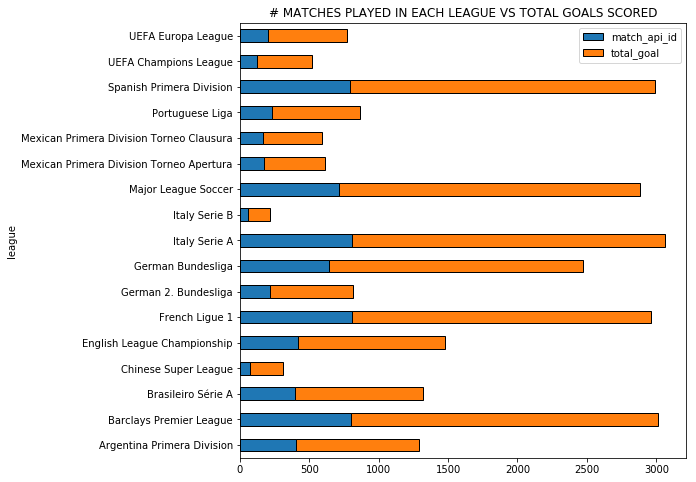

In [25]:
data["total_goal"] = data["score1"]+data["score2"]
data.groupby(["league"]).agg({"match_api_id":"count","total_goal":"sum"}).plot(kind="barh",
                                                                               stacked =True,
                                                                               figsize=(8,8),
                                                                               linewidth = 1,
                                                                               edgecolor = "k"*data["league"].nunique()
                                                                              )
plt.title("# MATCHES PLAYED IN EACH LEAGUE VS TOTAL GOALS SCORED")
plt.show()

### PROPORTION OF MATCHES PLAYED AND GOALS SCORED IN LEAGUES

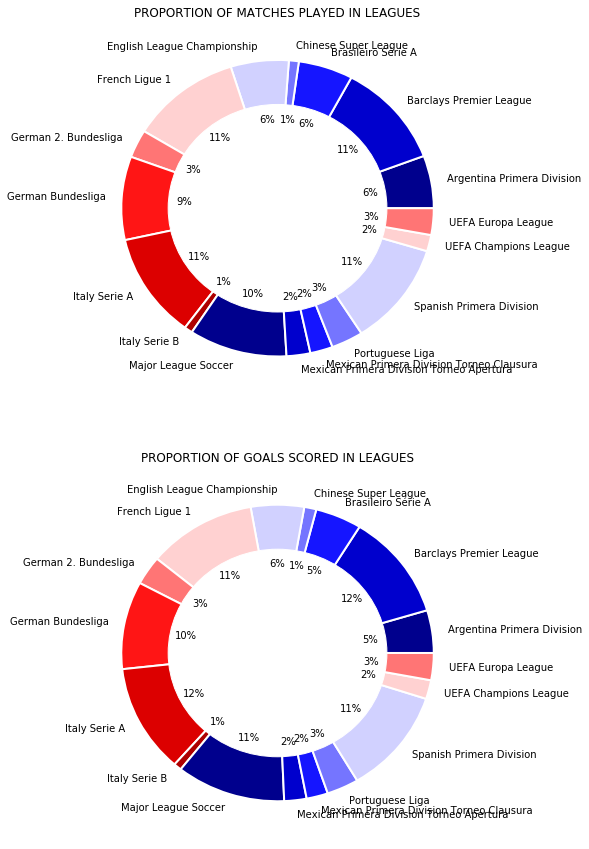

In [26]:
plt.figure(figsize=(7,15))
plt.subplot(211)
agg = data.groupby(["league"]).agg({"match_api_id":"count","total_goal":"sum"})
agg["match_api_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF MATCHES PLAYED IN LEAGUES")
plt.subplot(212)
agg["total_goal"].plot.pie(colors=sns.color_palette("seismic",10),
                           autopct="%1.0f%%",
                           wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GOALS SCORED IN LEAGUES")
plt.show()

### TOP TEAMS

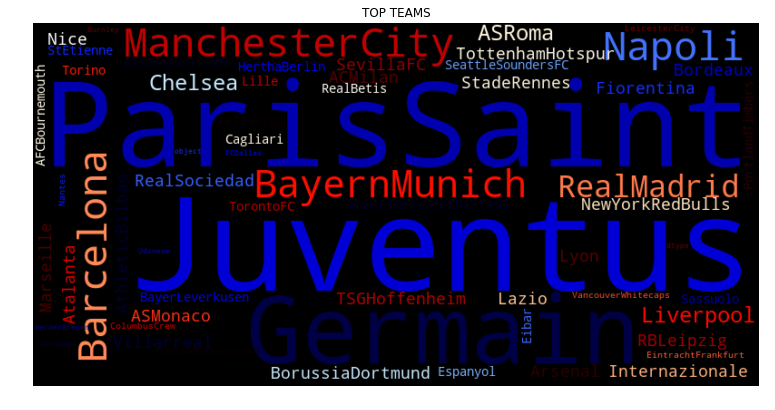

In [31]:
from wordcloud import WordCloud
import nltk
wrd = data[data["win"] != "DRAW"]["win"].to_frame()
wrd = wrd["win"].value_counts()[wrd["win"].value_counts() > 25].keys().str.replace(" ","")
wrd = pd.DataFrame(wrd)
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(wrd[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("TOP TEAMS")
plt.show()